In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
class_names=['buildings', 'forest', 'glacier','mountain','sea','street']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes=len(class_names)
print(class_names_label)
image_size=(150,150)


{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [3]:
#load dataset
def load_data():
    directory=os.path.abspath("")
    directory=directory + "\dataset"
    #print(directory)
    category=['seg_train','seg_test']
    output=[]
    for eachcategory in category:
        #print(eachcategory)
        path=os.path.join(directory,eachcategory)
        #print(path)
        images=[]
        labels=[]        
        #print('Loading {}'. format(eachcategory) + '...')
        
        for folder in os.listdir(path):
            label=class_names_label[folder]
            for file in os.listdir(os.path.join(path, folder)):
                img_path=os.path.join(os.path.join(path,folder),file)
                #print(img_path)
                image=cv2.imread(img_path)
                image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,image_size)
                
                images.append(image)
                labels.append(label)
        images=np.array(images, dtype='float32')
        labels=np.array(labels, dtype='int32')
        
        output.append((images,labels))
    return output
print('Data loaded...')

Data loaded...


In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()
print(len(train_images))

14034


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
print(len(train_labels))

14034


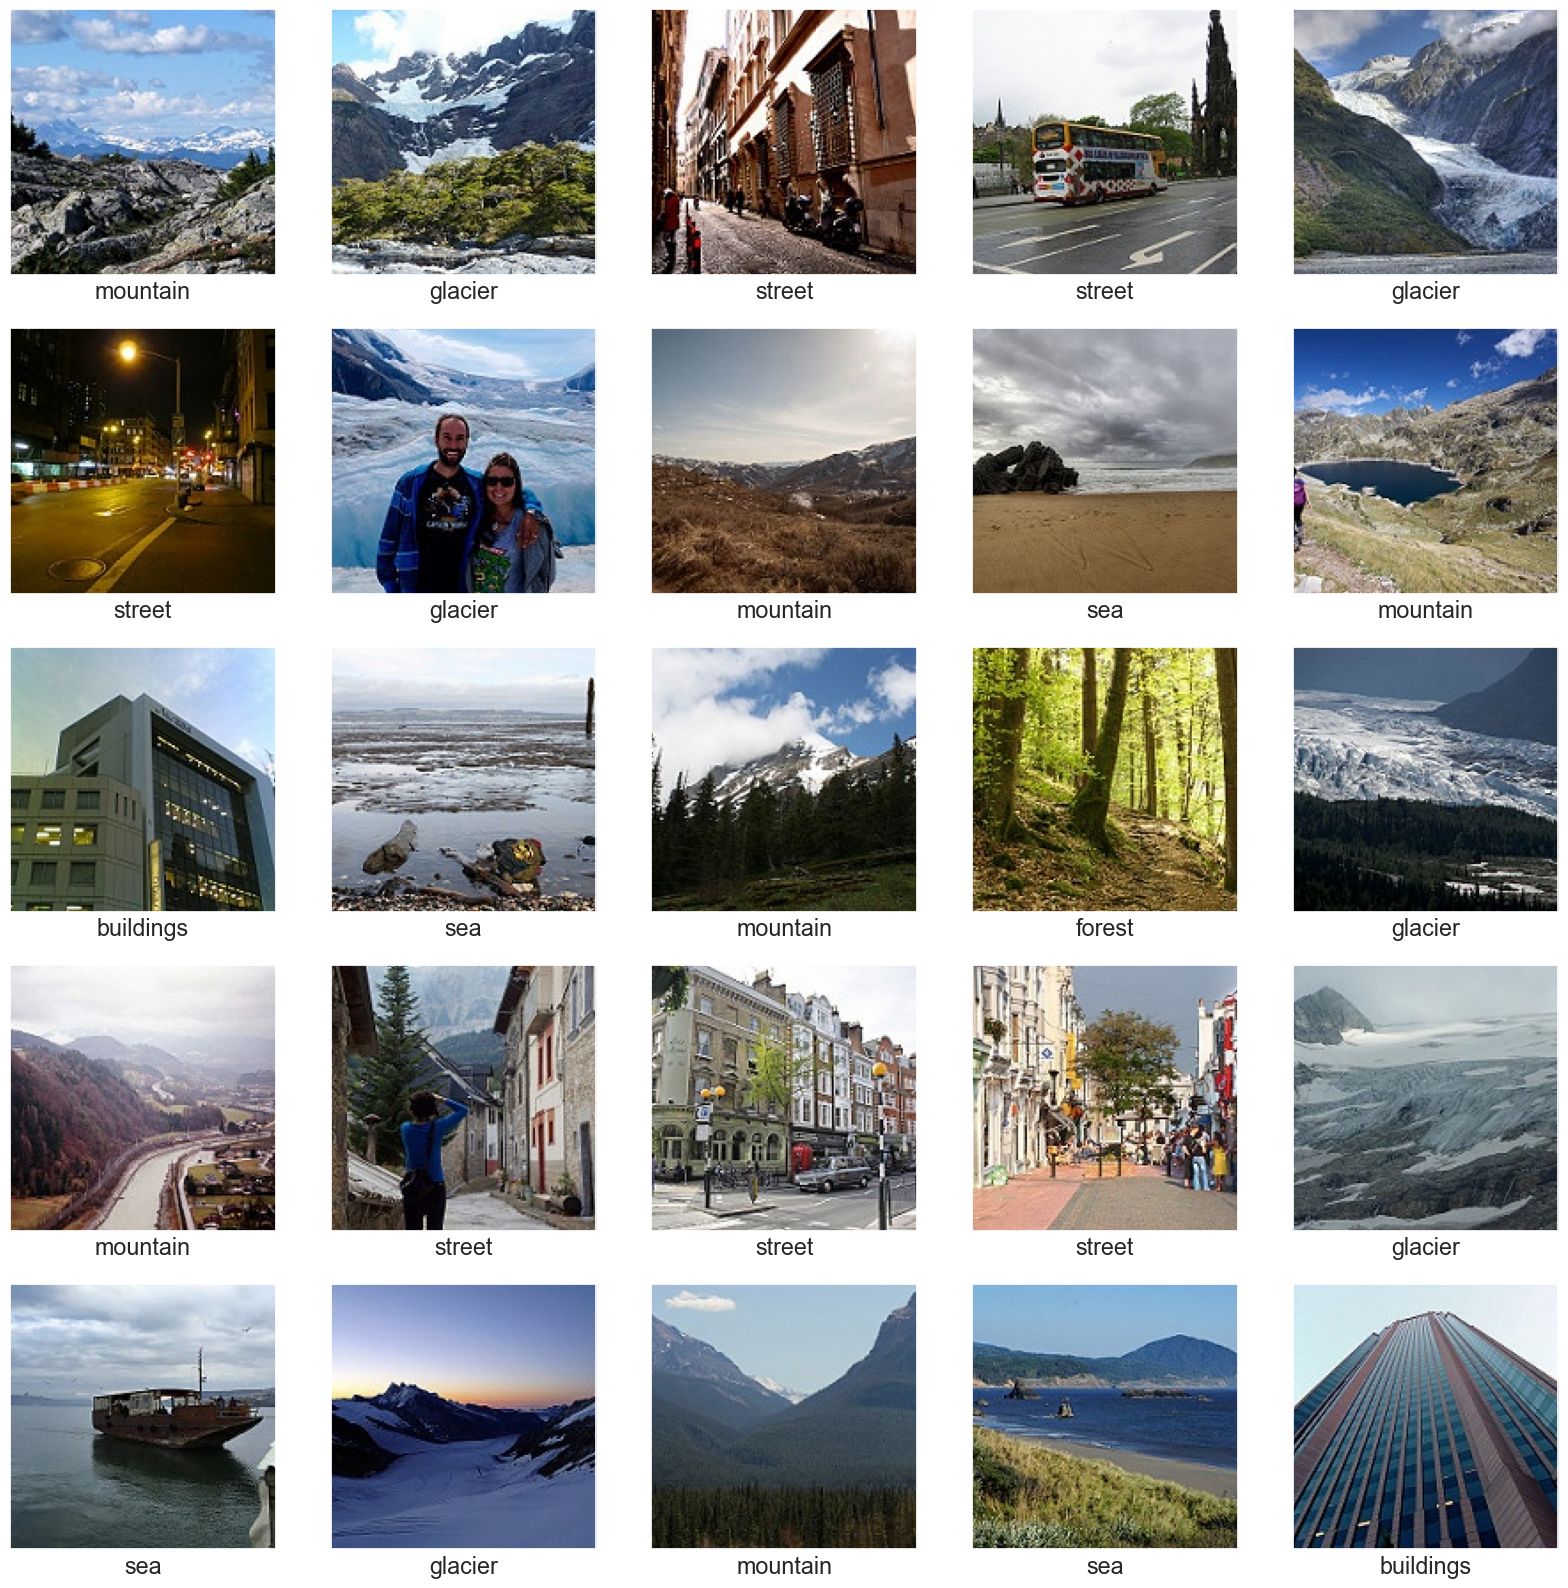

In [6]:
def display_example(class_name, images, labels):
    figsize=(20,20)
    fig=plt.figure(figsize=figsize)
    #fig.subtitle("Some examples of images from the datset", fontsize=16) - deprecated?
    for i in range(25):
        plt.subplot(5,5, i+1)
        plt.yticks([])
        plt.xticks([])
        plt.grid(False)
        #image=cv2.resize(images[i], figsize)
        #plt.imshow(image.astype(np.uint8))
        plt.imshow(images[i].astype(np.uint8))
        plt.xlabel(class_names[labels[i]])
    plt.show()
display_example(class_names,train_images,train_labels)    

In [7]:
#model = Sequential()

#model.add(Conv2D(32,(3,3), activation='relu', input_shape=(150, 150,3)))
#model.add(MaxPooling2D((2,2)))
#model.add(Conv2D(32,(3,3), activation='relu'))
#model.add(MaxPooling2D((2,2)))
#model.add(Flatten())
#model.add(Dense(64, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))


In [8]:
model = Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(6,activation=tf.nn.softmax)
    ])

In [9]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
#model.fit(train_images, train_labels, batch_size=64,epochs=4)
history=model.fit(train_images, train_labels, batch_size=128,epochs=8,validation_split=0.2)

Epoch 1/8
88/88 [==============================] - 163s 2s/step - loss: 44.4261 - accuracy: 0.3337 - val_loss: 1.3838 - val_accuracy: 0.4435
Epoch 2/8
88/88 [==============================] - 170s 2s/step - loss: 1.1502 - accuracy: 0.5688 - val_loss: 1.2960 - val_accuracy: 0.5002
Epoch 3/8
88/88 [==============================] - 170s 2s/step - loss: 0.7527 - accuracy: 0.7323 - val_loss: 1.4970 - val_accuracy: 0.5045
Epoch 4/8
88/88 [==============================] - 156s 2s/step - loss: 0.4711 - accuracy: 0.8370 - val_loss: 1.6201 - val_accuracy: 0.5155
Epoch 5/8
88/88 [==============================] - 155s 2s/step - loss: 0.2903 - accuracy: 0.9040 - val_loss: 1.8251 - val_accuracy: 0.4948
Epoch 6/8
88/88 [==============================] - 149s 2s/step - loss: 0.2165 - accuracy: 0.9332 - val_loss: 2.0503 - val_accuracy: 0.5226
Epoch 7/8
88/88 [==============================] - 168s 2s/step - loss: 0.1610 - accuracy: 0.9523 - val_loss: 2.3260 - val_accuracy: 0.5023
Epoch 8/8
88/88 [==

In [36]:
def plot_accuracy_loss(history):
    fig=plt.figure(figsize=(20,10))
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label='acc')
    plt.plot(history.history['val_accuracy'], 'ro--', label='val_acc')
    plt.title('train_acc VS val_acc')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.rcParams['axes.facecolor'] = 'white'
    plt.legend(fontsize = "large")

    
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label='loss')
    plt.plot(history.history['val_loss'], 'ro--', label='val_loss')
    plt.title('train_loss VS val_loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.rcParams['axes.facecolor'] = 'white'
    plt.legend()

    
    plt.show()   

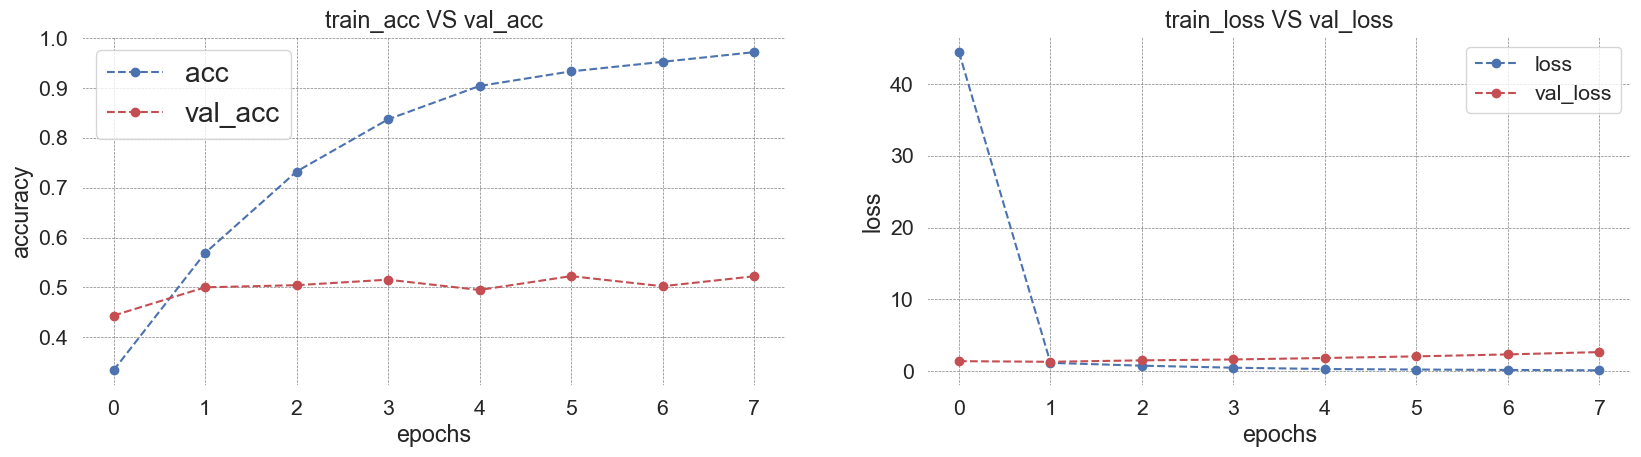

In [37]:
plot_accuracy_loss(history)